In [6]:
import torch

print(torch.cuda.is_available())


True


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os 

In [4]:
import glob

In [5]:
from tqdm.auto import tqdm

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [8]:
sns.set(style='darkgrid', font_scale=1.2)
sns.set_style("darkgrid")

In [9]:
import plotly.express as px

In [10]:
from PIL import Image 

In [11]:
import numpy as np 

In [12]:
import pandas as pd 

In [13]:
import torch 

In [14]:
import torch.nn as nn

In [15]:
from torch.optim import Adam 

In [16]:
import torchvision

In [17]:
from torchvision.datasets import ImageFolder

In [18]:
from torchvision.transforms import ToTensor, Compose, Resize, RandomHorizontalFlip, ConvertImageDtype, CenterCrop, Normalize

In [19]:
from torch.utils.data import DataLoader , Dataset

In [20]:
from torchvision.utils import make_grid, save_image

In [21]:
import torch.nn.functional as F

In [22]:
from torchsummary import summary

In [23]:
from IPython.display import Image

In [24]:
IMG_SIZE = 128 

In [25]:
DATASET_DIR = './Celeb-100k/Celeb-100k/'

In [26]:
print(os.listdir(DATASET_DIR))

['000001.jpg', '000002.jpg', '000003.jpg', '000006.jpg', '000008.jpg', '000009.jpg', '000016.jpg', '000017.jpg', '000020.jpg', '000021.jpg', '000022.jpg', '000024.jpg', '000026.jpg', '000028.jpg', '000030.jpg', '000033.jpg', '000035.jpg', '000036.jpg', '000037.jpg', '000039.jpg', '000041.jpg', '000042.jpg', '000044.jpg', '000046.jpg', '000047.jpg', '000050.jpg', '000055.jpg', '000056.jpg', '000057.jpg', '000060.jpg', '000062.jpg', '000064.jpg', '000065.jpg', '000066.jpg', '000067.jpg', '000068.jpg', '000073.jpg', '000075.jpg', '000076.jpg', '000078.jpg', '000079.jpg', '000082.jpg', '000084.jpg', '000085.jpg', '000086.jpg', '000090.jpg', '000091.jpg', '000093.jpg', '000094.jpg', '000095.jpg', '000098.jpg', '000099.jpg', '000101.jpg', '000102.jpg', '000103.jpg', '000104.jpg', '000105.jpg', '000106.jpg', '000107.jpg', '000110.jpg', '000111.jpg', '000112.jpg', '000114.jpg', '000115.jpg', '000116.jpg', '000117.jpg', '000118.jpg', '000123.jpg', '000124.jpg', '000125.jpg', '000128.jpg', '0001

In [27]:
image_size = 64

In [28]:
batch_size = 128

In [29]:
stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)

In [30]:
train_ds = ImageFolder('./Celeb-100k', transform=Compose([
    Resize(image_size),
    CenterCrop(image_size),
    ToTensor(),
    Normalize(*stats)]))

In [31]:
def denorm(img_tensors):
    return img_tensors * stats[1][0] + stats[0][0]

In [32]:
def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(denorm(images.detach()[:nmax]), nrow=8).permute(1, 2, 0))


In [33]:
def show_batch(dl, nmax=64):
    for images, _ in dl:
        show_images(images, nmax)
        break

In [34]:
class FacialBehaviorAnalysisModel(nn.Module):
    def __init__(self):
        super(FacialBehaviorAnalysisModel, self).__init__()
        
        
    def forward(self, x):
        
        return x 


In [35]:
facial_analysis_model = FacialBehaviorAnalysisModel()


In [36]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)

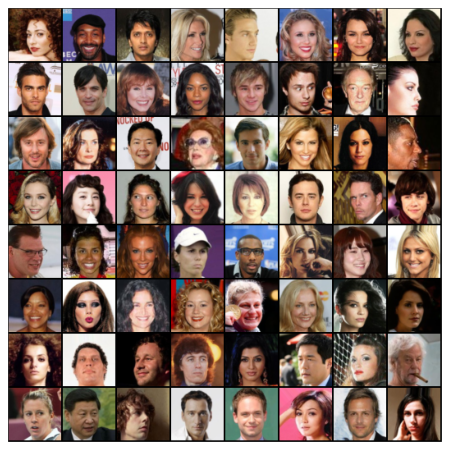

In [37]:
show_batch(train_dl)

In [38]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [39]:
def to_device(data, device):
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [40]:
class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        return len(self.dl)

In [41]:
device = get_default_device()
device

device(type='cuda')

In [42]:
train_dl = DeviceDataLoader(train_dl, device)

In [43]:
discriminator = nn.Sequential(
    nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.LeakyReLU(0.2, inplace=True),

    nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.LeakyReLU(0.2, inplace=True),

    nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.LeakyReLU(0.2, inplace=True),

    nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(512),
    nn.LeakyReLU(0.2, inplace=True),

    nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=0, bias=False),

    nn.Flatten(),
    nn.Sigmoid())

In [44]:
discriminator = to_device(discriminator, device)

In [45]:
latent_size = 128

In [46]:
generator = nn.Sequential(

    nn.ConvTranspose2d(latent_size, 512, kernel_size=4, stride=1, padding=0, bias=False),
    nn.BatchNorm2d(512),
    nn.ReLU(True),

    nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.ReLU(True),

    nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.ReLU(True),

    nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.ReLU(True),

    nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1, bias=False),
    nn.Tanh()
)

torch.Size([128, 3, 64, 64])


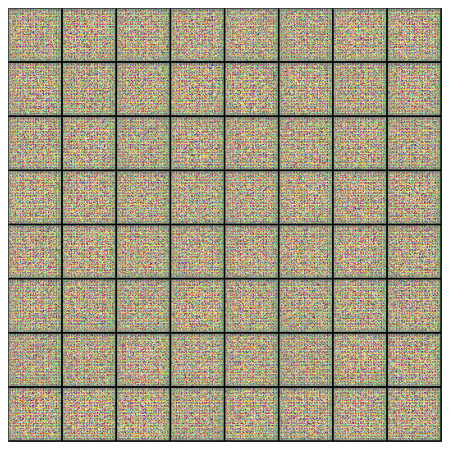

In [47]:
xb = torch.randn(batch_size, latent_size, 1, 1) # random latent tensors
fake_images = generator(xb)
print(fake_images.shape)
show_images(fake_images)

In [48]:
generator = to_device(generator, device)

In [49]:
def train_discriminator(real_images, opt_d):
    opt_d.zero_grad()

    real_preds = discriminator(real_images)
    real_targets = torch.ones(real_images.size(0), 1, device=device)
    real_loss = F.binary_cross_entropy(real_preds, real_targets)
    real_score = torch.mean(real_preds).item()

    latent = torch.randn(batch_size, latent_size, 1, 1, device=device)
    fake_images = generator(latent)

    fake_targets = torch.zeros(fake_images.size(0), 1, device=device)
    fake_preds = discriminator(fake_images)
    fake_loss = F.binary_cross_entropy(fake_preds, fake_targets)
    fake_score = torch.mean(fake_preds).item()

    loss = real_loss + fake_loss
    loss.backward()
    opt_d.step()
    return loss.item(), real_score, fake_score

In [50]:
def train_generator(opt_g):
    opt_g.zero_grad()
    
    latent = torch.randn(batch_size, latent_size, 1, 1, device=device)
    fake_images = generator(latent)

    preds = discriminator(fake_images)
    targets = torch.ones(batch_size, 1, device=device)
    loss = F.binary_cross_entropy(preds, targets)

    loss.backward()
    opt_g.step()
    
    return loss.item()

In [51]:
fake_dir = 'fake'
os.makedirs(fake_dir, exist_ok=True)

In [52]:
def save_samples(index, latent_tensors, show=True):
    fake_images = generator(latent_tensors)
    fake_fname = 'fake-image-{0:0=4d}.png'.format(index)
    save_image(denorm(fake_images), os.path.join(fake_dir, fake_fname), nrow=8)
    print('Saving', fake_fname)
    if show:
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(fake_images.cpu().detach(), nrow=8).permute(1, 2, 0))

In [53]:
fixed_latent = torch.randn(64, latent_size, 1, 1, device=device)

Saving fake-image-0000.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


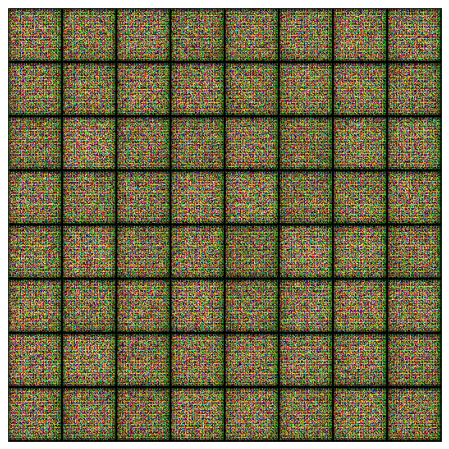

In [54]:
save_samples(0, fixed_latent)

In [3]:
def fit(epochs, lr, start_idx=1):
    torch.cuda.empty_cache()
    
    losses_g = []
    losses_d = []
    real_scores = []
    fake_scores = []
    
    opt_d = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))
    opt_g = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
    
    for epoch in range(epochs):
        for real_images, _ in tqdm(train_dl):
            loss_d, real_score, fake_score = train_discriminator(real_images, opt_d)
            loss_g = train_generator(opt_g)

        losses_g.append(loss_g)
        losses_d.append(loss_d)
        real_scores.append(real_score)
        fake_scores.append(fake_score)
        
        print("Epoch [{}/{}], loss_g: {:.4f}, loss_d: {:.4f}, real_score: {:.4f}, fake_score: {:.4f}".format(
            epoch+1, epochs, loss_g, loss_d, real_score, fake_score))
    
        save_samples(epoch+start_idx, fixed_latent, show=False)
    
    return losses_g, losses_d, real_scores, fake_scores


In [4]:
lr = 0.0002
epochs = 10

In [5]:
history = fit(epochs, lr)
"""checkpoint1 = torch.load('G.ckpt') 
generator.load_state_dict(checkpoint1)
checkpoint2 = torch.load('D.ckpt')  
discriminator.load_state_dict(checkpoint2)"""

NameError: name 'torch' is not defined

In [1]:
"""losses_g, losses_d, real_scores, fake_scores = [], [], [], []
for real_images, _ in tqdm(train_dl):
    loss_d, real_score, fake_score = train_discriminator(real_images, opt_d)
    loss_g = train_generator(opt_g)

    losses_g.append(loss_g)
    losses_d.append(loss_d)
    real_scores.append(real_score)
    fake_scores.append(fake_score)"""
losses_g, losses_d, real_scores, fake_scores = history

NameError: name 'history' is not defined

In [138]:
torch.save(generator.state_dict(), 'G.ckpt')
torch.save(discriminator.state_dict(), 'D.ckpt')

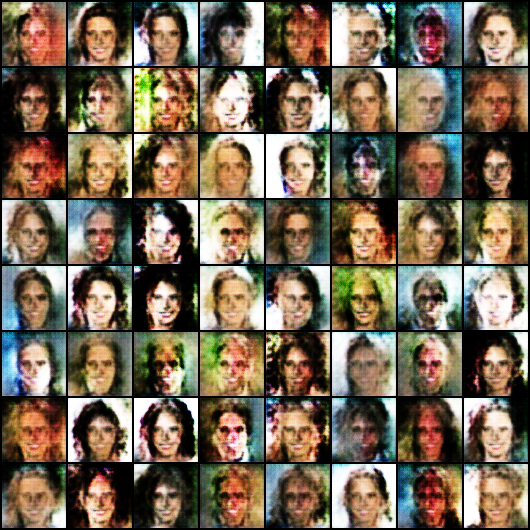

In [139]:
Image('./Fake/fake-image-0001.png')

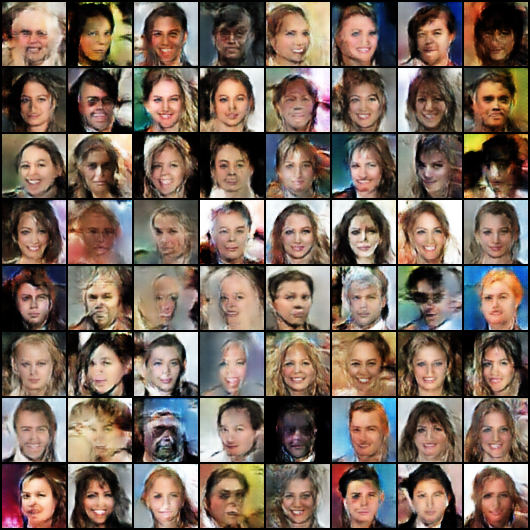

In [140]:
Image('./Fake/fake-image-0005.png')

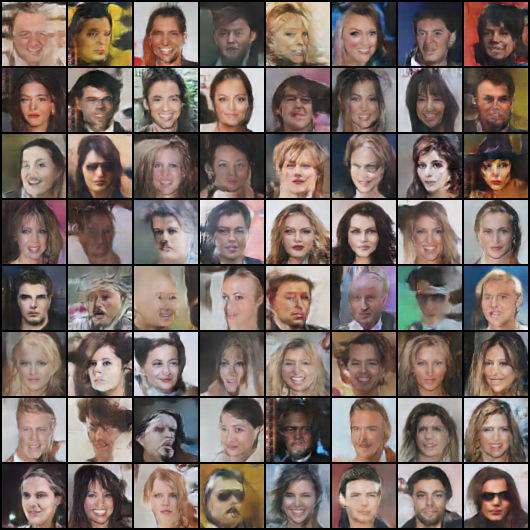

In [141]:
Image('./Fake/fake-image-0020.png')

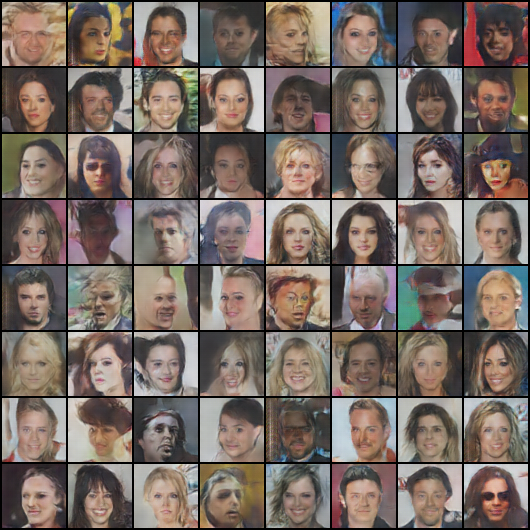

In [142]:
Image('./Fake/fake-image-0025.png')

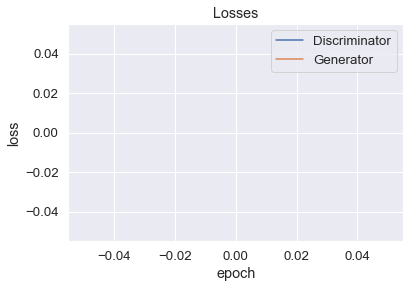

In [143]:
plt.plot(losses_d, '-')
plt.plot(losses_g, '-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Discriminator', 'Generator'])
plt.title('Losses');

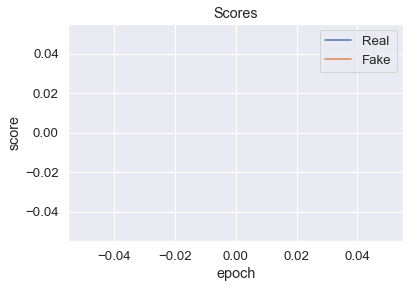

In [144]:
plt.plot(real_scores, '-')
plt.plot(fake_scores, '-')
plt.xlabel('epoch')
plt.ylabel('score')
plt.legend(['Real', 'Fake'])
plt.title('Scores');

In [149]:
import os 
import glob
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.2)
sns.set_style("darkgrid")
import plotly.express as px
from PIL import Image
import numpy as np
import pandas as pd  
import torch  
import torch.nn as nn
from torch.optim import Adam 
import torchvision
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor, Compose, Resize, RandomHorizontalFlip, ConvertImageDtype, CenterCrop, Normalize
from torch.utils.data import DataLoader , Dataset
from torchvision.utils import make_grid, save_image
import torch.nn.functional as F
from torchsummary import summary
from IPython.display import Image

# Define the path to the dataset
DATASET_DIR = './Celeb-100k/Celeb-100k/'

# Define image size and batch size
image_size = 64
batch_size = 128

# Define data transformation
stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)
transform = Compose([
    Resize(image_size),
    CenterCrop(image_size),
    ToTensor(),
    Normalize(*stats)
])

# Load the dataset
dataset = ImageFolder(DATASET_DIR, transform=transform)

# Define DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=3, pin_memory=True)

# Function to visualize images
def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images.detach()[:nmax], nrow=8).permute(1, 2, 0))

# Display a batch of images
for images, _ in dataloader:
    show_images(images)
    break

# Assuming you've already trained a deepfake detection model and saved it as `deepfake_model.pth`
# Load the pre-trained deepfake detection model
class DeepFakeDetector(nn.Module):
    def __init__(self):
        super(DeepFakeDetector, self).__init__()
        # Define your model architecture here
        # Example:
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(128 * 16 * 16, 512),
            nn.ReLU(),
            nn.Linear(512, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Load the pre-trained model
deepfake_model = DeepFakeDetector()
deepfake_model.load_state_dict(torch.load('deepfake_model.pth'))
deepfake_model.eval()

# Function to predict if an image is a deepfake
def predict_deepfake(image):
    with torch.no_grad():
        output = deepfake_model(image)
        predicted_label = torch.round(output).item()
    return predicted_label

# Function to display classification result
def display_classification_result(image, is_deepfake):
    plt.imshow(image.permute(1, 2, 0))
    if is_deepfake:
        plt.title("DEEPFAKE")
    else:
        plt.title("ORIGINAL")
    plt.axis('off')
    plt.show()

# Sample usage of deepfake detection
for images, _ in dataloader:
    for image in images:
        # Predict if the image is a deepfake
        is_deepfake = predict_deepfake(image.unsqueeze(0)) == 1
        # Display classification result
        display_classification_result(image, is_deepfake)
    break


FileNotFoundError: Couldn't find any class folder in ./Celeb-100k/Celeb-100k/.